<a href="https://colab.research.google.com/github/lalit-jamdagnee/Learning_ML/blob/main/Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The computer scientist Yann LeCun famously said that **"if intelligence was a cake, unsupervised learning would be the cake, supervised learning would be the icing on the cake, and reinforcement learning would be the cherry on the cake"**. In other words, there is a huge potential in unsupervised learning that we have only barely started to sink our teeth into.

Say you want to create a system that will take a few pictures of each item on a manufacturing production line and detect which items are defective. You can fairly easily create a system that will take pictures automatically, and this might give you thousands of pictures every day. You can then build a reasonabl larged dataset in justa few weeks. But wait, there are no labels! If you want to train a regular binary classifier that will predict whether an item is defective or not, you will need to label every single picture as "defective" or "normal". This will generally require human experts to sit down and manually go through all the pictures. This is a long, costly, and tedious task, so it will usually only be done on a small subset of the avialable pictures. As a result, the labeled dataset will be quite small, and the classifier's performance will be disappointing. Moreover, every time the company makes any change to its products, the whole process will need to be started over from scrath. Wouldn't it be great if the algorithm could just expoloit the unlabeled data without needing humans to label every picture? Enter unsupervised learning.

In the previous chapter, we looked the most common unsupervised machine learning task: dimensionality reduction. In this chapter we will look at a few more unsupervised learning tasks and algorithms:

*Clustering*

  The goal is to group similar instances together into *Clusters*. Clustering is a great tool for data analysis, customer segmentation, recommender systems, search engines, image segmentation, semi-supervised learning, dimensionality reduction, and more.

*Anomaly Detection*

  The objective is to learn what "normal" data looks like, and then use that to detect abnormal instances, such as defective items on a production line or a new trend in a time series.

*Density estimation*

  This is the task of estimating the *probability density function* (PDF) of the random process that generated the datset. Density estimation is commonly used for anomaly detection: instances located in very low-density regions are likely to be anomalies. It is also useful for data analysis and visualization.

We will start with clustering, using K-Means and DBSCAN, and then we will discuss Gaussian mixture models and see how they can be used for density estimatoin, clustering, and anomaly detection.


# Clustering

Suppose you are hiking in the mountains, and you stumble upon a plant you have never seen before. You look around and you notice a few of them. They are not identical, but they are sufficiently similar to say that they belong to the same species. You may need a botanist what kind of species are they, but you certainly not need don't need an expert to identify groups of similar-looking objects. This is called *clustering*. It is the task of identifying similar instances and assigning them to *clusters*, or groups of similar instances.

Just like classification, each instance is assigned to a group. Consider the figure below, the left plot is the iris dataset, where each isntace's species is represented with a different label. It is a labeled dataset, for which classification algorithms such as Logistic Regression, SVMs, or Random Forest classifiers as well suited. On the right is the same dataset, but without the labels, so you cannot use a classification algorithms anymore. Here we will have to use clustering algorithms to identify each instances to their respective clusters, see the right plot, three clusters are identified fairly well (e.g. using a Gaussain mixture model, only 5 instances out of 150 are assigned to the wrong cluster).

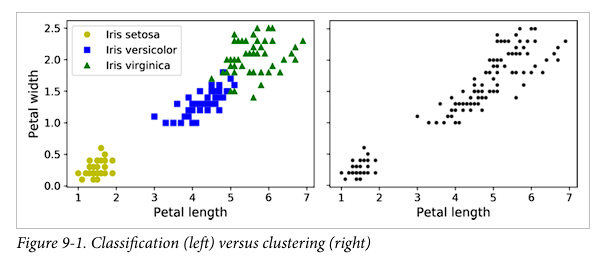

Clustering is used in wide variety of applications, including these:

*For customer segmentation*

  you can cluster your customers based on their purchase and their activity on your website. This is useful to understand who your customers are and what they need, so you can adapt your products and marketing campaings to each segment. For example, customer segmentation can be useful in *recommender systems* to suggest content that other users in the same cluster enjoyed.

*For Data Analysis*

  When you analyze a new dataset, it can be helpful to run a clustering algorithm, and then analyze each cluster separately.

*As a dimensionality reduction technique*

  Once a dataset has been clustered, it is usually possible to measure each instance's *affinity* with each cluster (affinity is any measure of how well an instance fits into a cluster). If there are K clusters, then this vector is k-dimensional. This vector is typically much lower-dimensional than the original feature vector, but it can preserve enough information for further processing.

*For search engines*

  Some search engines let you search for images that are similar to a reference image. To build such a system, you would first apply a clustering algorithm to all the images in your database; similar images would end up in the same cluster. Then when a user provides a reference image, all you need to do is use the trained clusterin model to find this image's cluster, and you can then simply return all the images from this cluster.

There is no universal defination of what a cluster is: it really depends on the context, and different algorithms will capture different kinds of clusters. Some algorithms look for instances centered around a particular point, called a *centroid*. Others look for continous regoins of densely packed instances: these clusters can take on any shape.

In the following sections, we will look at two popular clustering algorithms, K-Means and DBSCAN, and explore some of their applications, such as nonlinear dimensionality reduction, semi-supervised learning, and anomaly detection.

## K-Means

In [1]:
import numpy as np
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples = 1000, centers=blob_centers, cluster_std=blob_std, random_state=42)

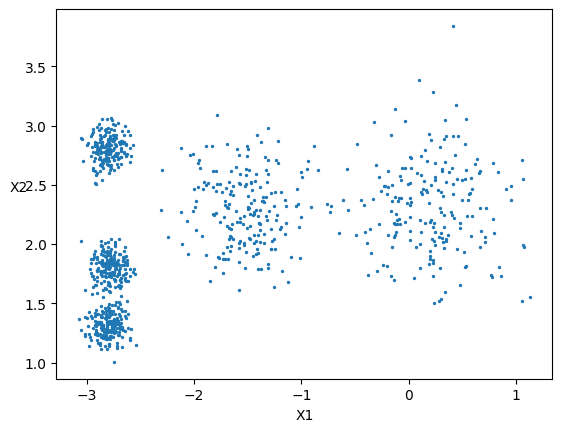

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], s=2)
plt.ylabel('X2', rotation=0)
plt.xlabel('X1')
plt.show()

Consider the unlabeled dataset represented in the figure above, we can clearly see five blobs of instances. The k-Means algorithm is a simple algorithm capable of clustering this kind of dataset very quickly and efficiently, often in just a few iterations.

Let's train a K-Means cluster on this dataset. It will try to find each blob's center and assign each instance to the closest blob:

In [4]:
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

You have to specify the number of clusters k that algorithm must find. The **KMeans** instance preserves a copy of the labels of the instances it was trained on, available via the **labels_** instance variable:

In [5]:
y_pred is kmeans.labels_

True

In [6]:
# We can also take a look at the five centroids that the algorithm found:
kmeans.cluster_centers_

array([[-2.77626735,  1.81090134],
       [ 0.21477276,  2.3188261 ],
       [-1.49844839,  2.28907111],
       [-2.79227894,  2.80602457],
       [-2.79858557,  1.31201843]])

In [7]:
# In this case we have the label for the dataset, lets compare it with our predictions
from sklearn.metrics import root_mean_squared_error as rmse
rmse(y, y_pred)

1.1233877335986895

In [8]:
# You can easily assign new instnaces to the cluster who centroid is closest:
import numpy as np

X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 3, 3], dtype=int32)

If we plot the cluster's decision boundaries, we get the following:

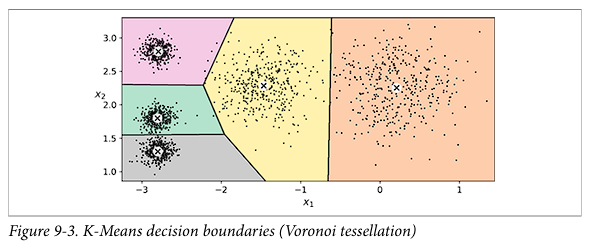

Most of instances were clearly assigned to the appropriate cluster, but a few instances were probably mislabelled. The K-Means algorithm does not behave very well when the blobs have very different diameters because all it cares about when assigning an instance to a cluster is the distance to the centroid.

Instead of assigning each instance to a single cluster, which is called *hard clustering*, it can be useful to give each instance a score per cluster, which is called *soft clustering*. The score can be the distance between the instance and the centroid;

In the KMeans clas, the **transform()** method measures the distance from each instance to every centroid:

In [9]:
kmeans.transform(X_new)

array([[2.7826999 , 0.38441829, 1.52607657, 2.90628582, 2.88190906],
       [5.7793618 , 2.80341593, 4.50772671, 5.84809122, 5.83925622],
       [1.2099636 , 3.28614695, 1.66134798, 0.28420857, 1.69995575],
       [0.72450898, 3.21987389, 1.51629424, 0.36986359, 1.20493484]])

### The K-Means algorithm

So, how does the algorithm work? Well, suppose you were given the centroids. You could easily label all the instances in the dataset by assigning each of them to the cluster whose centroid is closest.

Conversely, if you were given all the instance labels, you could easily locate all the centroids by computing the mean of the instances for each cluster.

But you are given niether the labels nor the centroids, sohow can you proceed? Well, just start by placing the centroids randomly (e.g., by picking k instances at random and using their locations as centroids). Then label the instances, update the centroids, label the instances, update the centroids and so on until the centroids stop moving. The algorithm is guranteed to converge in a finite number of steps(usually quite small); it will not oscillate forever.

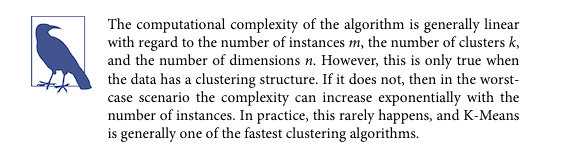

You can see the algorithm in action in figure below, the centroids are initialized randomly (top left), then the instances are labeled (top right), then the centroids are updated (center left), the instances are relabeled (center right), and so on. As you can see, in just three iterations, the algorithm has reached a clustering that seems close to optimal.

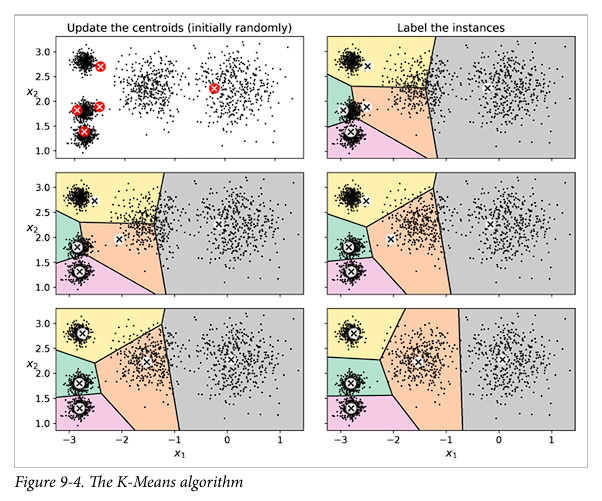

Although the algorithm is guranteed to converge, it may not converge to the right solution (i.e., it may converge to a local optimum): whether it does or not depends on the centroid initialization.

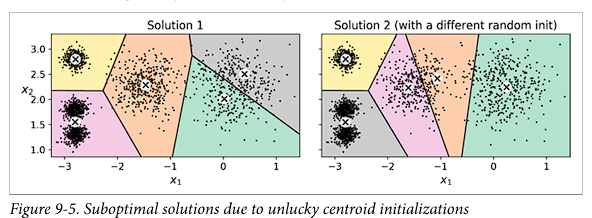

Let's look at a few ways you can reduce this risk by improving the centroid initialization.

### Centroid initialization methods

If you happen to know approximately where the centroids should be , then you can set the **init** hyperparameter to a NumPy array containing the list of centrodis, and set *n_init* to 1:


In [10]:
good_init = np.array([[-3,3],[-3,2],[-3,1],[-1,2],[0,2]])
kmeans = KMeans(n_clusters=5, init = good_init, n_init = 1)

Another solution is to run algorithm multiple times with different random initializations and keep the best solution. THe number of random initializations is controlled by the **n_init** hyperparameter: by default, it is equal to 10 , which means that the whole algorithm runs 10 times when you can **fit()** method, and Scikit-Learn keeps the best solution.

Scikit-learn uses the a performance metrics called **the model's inertia**, which is the mean squarred distance between each instance and its closest centroid. The KMeans class runs the algorithm *n_init* times and keeps the model with the lowest inertia. We can access the model's *inertia* in Scikit-learn as follows:

In [11]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

KMeans(n_clusters=5)

In [12]:
kmeans.inertia_

116.01906302701981

The **score()** method returns the negative inertia Because a predictor's *score()* method must always respect Scikit-Learns "greater is better" rule: if a predictor is better than another, its *score()* method should return a greater value:

In [13]:
kmeans.score(X)

-116.0190630270198

### Accelearted K-Means and mini-batch K-Means


Another important improvement to the K-Means algorithm was proposed in a 2003 paper by Charles Elkan. It considerably accelerates the algorithm by avoiding many unnecessary distance calculations. Elkan achieved this by exploiting the triangle inequality (i.e., that a straight line is always the shortest distance between two points) and by keeping track of lower and upper bounds for distances between instances and centroids. This is the algorithms the KMeans class uses by default ( you can force it to use the original algorithm by setting the **algorithm** hyperparameter to **"full"**, although you  probably will never need to).

Yet another important vairant of the K-Means algorithm was proposed in a 2010 paper by David Sculley. Instead of using the full dataset at each iteration, the algorithm is capable of using mini-batches, moving the centroids just slightly at each iteration. This speeds up the algorithms typcially three or four times and makes it possible to cluster huge datsets that do not fit in memory. Scikit-Learn implements this algorithm in the **MiniBatchKMeans** class. You can just use this class like the **KMeans** class:

In [14]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5)

If the dataset does not fit in memory, the simplest option is to use the *memmap* class. Alternatively, you can pass one mini-batch at a time to the **partial_fit()** method, but this will require much more work.

Although the Mini-Batch k-Means algorithm is much faster than the regular K-Means algorithm, its inertia is generally slightly worse, especially as the number of clusters increases. See the following figure for more clarification:

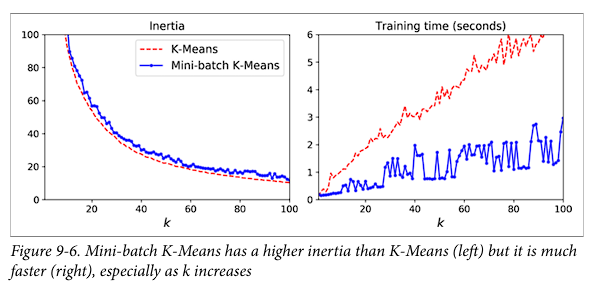

### Finding the optimal number of clusters

So far, we have set the number of clusters k to 5 because it as obvious by looking at the data that this was the correct number of clusters. But in general, it will not be so easy to know how to set k,  and the result might be quite bad if you set it to the wrong value. See the figure below, it shows how setting k to 3 or 8 results in fairly bad models.

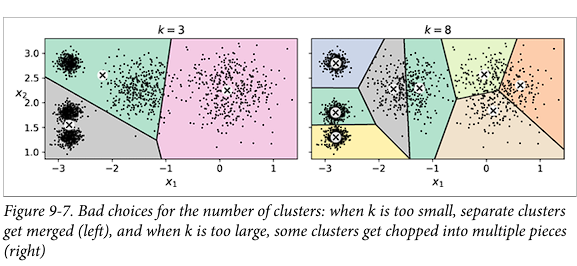

You might be thinking that we could just pick the model with the lowest inertia. Unfortunately, it is not that simple. The inertia for k=3 is 653.2, which is much higher than for k=5 (which was 211.6). But with k=8, the inertia is just 119.1. THe inertia is not a good performance metric when trying to choose k because it keeps getting lower as we increase k. Indeed, the more clusters there aer, the closer each instance will be to its closes centroid, therefore the lower the inertial will be. see the figure below:

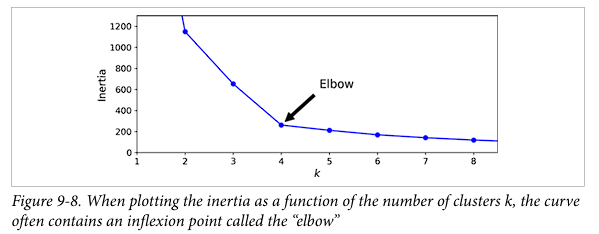

From the above figure we can clearly see that after the value of 4 there is no dramatic change in the value of inertia, so we might conclude from the above diagram that k=4 is appropriate value for n_clusters, but its not the best approach.

A more precise approach (but also more computationally expensive) is to use the **silhouette score**, which is the mean *silhouette coefficient* over all the instances. An instance's silhouette coefficient is equal to (b-a)/max(a,b), where a is the mean distance to the other instances in the same cluster and b is the mean nearest-cluster distance. It's value varies between -1 and +1.

A value of coefficient close to +1 means that the instances is well inside its own cluster and far from other clsueters, while a coefficient close to 0 means that it is close to a cluster boundary, and finally a coefficient close to -1 means that the instance may have been assigned to the wrong cluster.

To compute the silhouette score, you can use Scikit-Learn's **silhouette_score()** functioj, giving it all the instances in the datset and the labels they were assigned

In [15]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.6362256753994109

Let's see the score of different number of clusters:

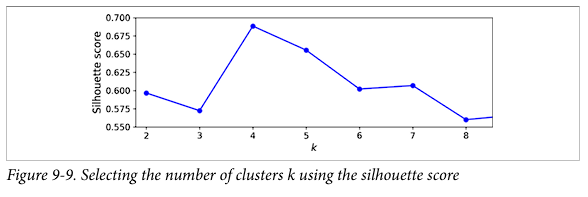

 As you can see, this visualization is much richer than the previous one: although it
 confirms that k = 4 is a very good choice, it also underlines the fact that k = 5 is quite
 good as well, and much better than k = 6 or 7. This was not visible when comparing
 inertias.

### Limits of K-Means

Despite its many merits, most notably being fast and scalable, k_Means is not perfect. As we saw, it is necessary to run the algorithm several times to avoid suboptimal solutions, pluse we need to specify the number of clusters, which can be quite a hassle.

Moreover, K-Means does not behave very well when the clusters have varying sizes, different densities, or nonshperical shapes. For example, figure below shows how K-Means clusters a dataset containing three ellipsoidal clusters of different dimensions, densities and orientations.

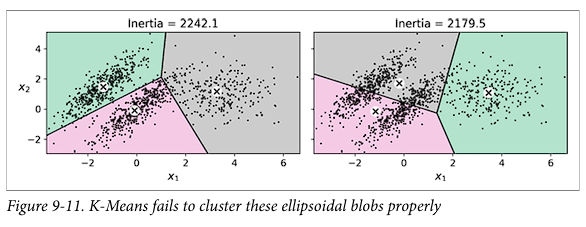

As we can see neither of these solutions are good. THe solution on left is better, but it still chops off 25% of the middle cluster and assigns it to the cluster on the right. The solution on the right is just terrible, even though its inertian is lower.

So depending on the data, different clustering algorithms may perform better. On these types of elliptical clsuters, Gaussian mixture models work great.

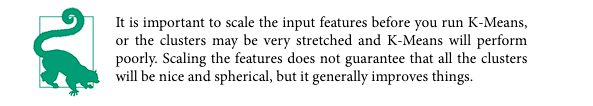

## Using Clustering for Image Segmentation

*Image segmentation* is the task of partitioning an image into multiple segments. In *semantic Segmentation*, all pixels that are part of the same object type get assigned to the same segment.

For example, in a self-driving car's vision system, all pixels that are part of a pedestrian's image might be assigned to the "pedestrian" segment. In *instance segmentation*, all pixels that are part of the same individual object are assigned to the same segment. In This case there would be a different segment for each pedestrian.

The state of the art in semantic or instance segmentation today is achieved using complex architectures based on convolutional neural networks. Here, we are going to do something much simpler: *color segmentation*.

We will simply assign pixels to the same segment if they have a similar color. In some applications, this may be sufficient, for e.g., if you want to analyze satellite images to measure how much total forest area there is in a region.



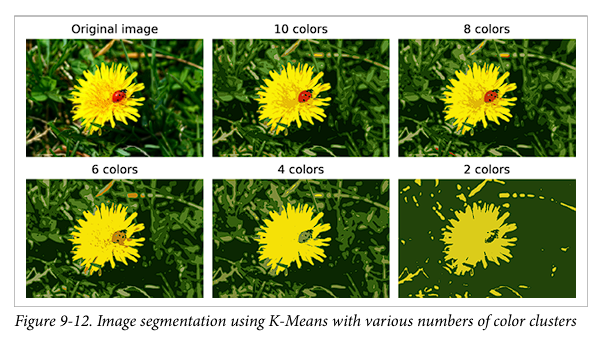

First, we will use Matplotlib's imread() function to load the images (see the upper left image in the figure above)

```
from matplotlib.image import imread
image = imread('path')
image.shape
>>(553,800, 3)
```

The image is represented in a 3D array. The first dimension's size is the height; the second is the width; and the third is the number of color channels in this case red, green and blue. In other words, for each pixels there is a 3D vector containing the intensities of red, green, and blue, each between 0.0 and 1.0 (or between 0 and 255).

The following code reshapes the array to get a long list of RGB colors, then it clusters these colors using K-Means.

```
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters = 8).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)
```

## Using Clustering for Preprocessing

Clustering can be an efficient approach to dimensionality reduction, in particular as a preprocessing step before a supervised learning algorithm. As an example of using clustering for dimensionality reduction, let's tackle the digit dataset, which is a simple MNIST-like dataset containing 1,797 grayscale 8X8 images representing the digits 0 to 9.

In [16]:
from sklearn.datasets import load_digits
X_digits, y_digits = load_digits(return_X_y=True)

In [17]:
# spliting the dataset into train set and a test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

In [18]:
# Now let's fit a Logistic Regression model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
# Let's evaluate its accuracy on the test set
log_reg.score(X_test, y_test)

0.9644444444444444

Ok, that's our baseline. Let's see if we can do better by uisng k-means as a preprocessing step. We will create a pipeline that will first cluster the training set into 50 clsuters and replace the image with their distance to these 50clusters, then apply a logistic regression model:

In [20]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=42)),
    ("log_reg", LogisticRegression())
])
pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('kmeans', KMeans(n_clusters=50, random_state=42)),
                ('log_reg', LogisticRegression())])

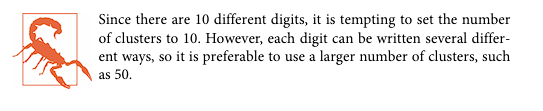

In [21]:
# Now let's evaluate its score on the test set
pipe.score(X_test, y_test)

0.96

So we are able to improve the accuracy of our model.

But we chose the number of clusters k arbitrarily; we can surely do better. Since K-Means is just a preprocessing step in a classification pipeline, finding a good value for k is much simpler than earlier. There's no need to perform silhouette analysis or minimize the inertia; the best value of k is simply the one that results in the best classification performance during cross-validation. We can use *GridSearchCV* to find the optimal number of clusters:

In [22]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(2,100))
# simple you can write param_grid = {'kmeans__n_cluster': [2, 3, 4,.. 99]}
param_grid

{'kmeans__n_clusters': range(2, 100)}

In [23]:
grid_clf = GridSearchCV(pipe, param_grid, cv=3)
grid_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_clusters=50, random_state=42)),
                                       ('log_reg', LogisticRegression())]),
             param_grid={'kmeans__n_clusters': range(2, 100)})

In [24]:
# now let's evaluate the performance of the best parameter
grid_clf.best_params_

{'kmeans__n_clusters': 58}

In [25]:
grid_clf.score(X_test, y_test)

0.9577777777777777

## Using Clustering for Semi-Supervised Learning

Another use case for cluster is in semi-supervised learning, when we have plenty of unlabeled instances and very few instances. Let's train a logistic Regression model on a sample of 50 labelled isntances from the digits dataset:


In [26]:
n_labeled = 50
log_reg = LogisticRegression()
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

LogisticRegression()

In [27]:
# let's evaluate its score on test set
log_reg.score(X_test, y_test)

0.7711111111111111

The accuracy is 81% . Let's see how we can do better. First, let's cluster the training set into 50 clusters. Then for each cluster, let's find the image closest to the centroid. We will call these images the *representative images*:

In [28]:
kmeans = KMeans(n_clusters = 50)
X_digits_dist = kmeans.fit_transform(X_train)
X_digits_dist.shape

(1347, 50)

In [29]:
representative_digit_idx = np.argmin(X_digits_dist, axis=0)

In [30]:
representative_digit_idx

array([ 591,  630, 1246, 1106,  239,  405,  824, 1060,  557,  850,  238,
       1018, 1029, 1267,  423,  304,  987,  490,  867,  337, 1156,  280,
        461,  497, 1285,  999,  320, 1220, 1050,  548, 1252, 1294,  217,
       1247,  432,   89,  360,  142,   39,  125, 1249,  794, 1300, 1314,
       1337,  678,  900, 1129,  714,  981])

In [31]:
X_representative_digits = X_train[representative_digit_idx]

In [32]:
X_representative_digits

array([[ 0.,  0.,  5., ...,  9.,  0.,  0.],
       [ 0.,  0.,  6., ...,  0.,  0.,  0.],
       [ 0.,  0.,  8., ...,  7.,  0.,  0.],
       ...,
       [ 0.,  0.,  1., ..., 15., 11.,  1.],
       [ 0.,  0.,  8., ...,  8.,  0.,  0.],
       [ 0.,  0.,  2., ..., 10.,  1.,  0.]])

In [33]:
X_representative_digits.shape

(50, 64)

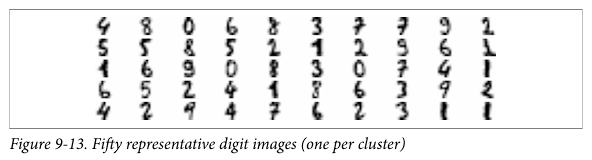

Let's look at each image and manually label it:

In [34]:
y_representative_digits = np.array([4,8,0,6,8,3,7,7,9,1,5,5,8,5,2,1,2,9,6,1,1,6,9,0,8,3,0,7,4,1,6,5,2,4,1,8,6,3,9,2,4,2,9,4,7,6,2,3,1,1])

In [35]:
y_representative_digits.shape

(50,)

Now we have a dataset with just 50 labeled instances, but instead of being random instances, ecah of them is representative image of its cluster. Let's see if the performance is any better:

In [37]:
log_reg = LogisticRegression()
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.08444444444444445

The accuracy have improved from 77% to 84%, although we are still training the model on 50 instances.

What if we propagated the labels to all the other instances in the same cluster? This is called *label propagation*:



In [38]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
  y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

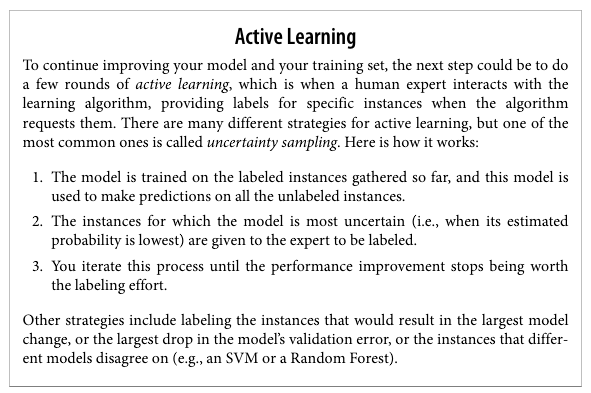

Before we move on to Gaussian mixture models, let's take a look at DBSCAN, another popular clustering alogorithm that illustrates a very different approach based on local density estimation. This approach allows the algorithm to identify cluster of arbitrary shapes.

## DBSCAN

This algorithm defines clusters as continous regions of high density. Here is how it works:

* For each instance, the algorithm counts how many instances are located within a small distance ɛ (epsilon) from it. This region is called the instance's *ɛ-neighborhood*.

* If an instance has at least *min_samples* instnaces in its ɛ-neighborhood (included itself), then it is considered a *core instances*. In other words, core instances are those located in dense regions.

* All instances in the neighborhood of a core instance belong to the same cluster. This neighborhood may included other core instances; therefore,  a long sequence of neighboring  core instances forms a single cluster.

* Any instance that is not a core instance and does not have one in its neighborhood is considered an anomaly.

This algorithm works well if all the clusters are dense enough and if they are well separated by low-density regions. The DBSCAN class in Scikit-learn is used for this. Let's test it on the moon dataset:

In [42]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [43]:
# The labels of all instances are now available in the labels_ instance variable:
dbscan.labels_

array([ 6,  0,  0,  0,  3,  1,  2,  3,  3,  0,  0,  3,  0,  4,  3,  3,  3,
        0,  1,  3,  0,  1,  5,  1,  1,  6,  0,  5,  4,  0,  6,  6,  3,  0,
        0,  6,  1,  6,  4,  5,  5,  3,  6,  4,  3,  1,  0, -1,  0,  6,  0,
        0,  0,  0,  4, -1,  1,  0,  4,  3,  0,  3,  1,  2,  3, -1,  3,  2,
        2,  0,  0,  0,  4,  0,  4,  1, -1,  5,  4,  0,  3,  0,  0,  1,  0,
        0,  3,  5, -1,  0, -1,  0,  0,  3,  6, -1,  3,  0,  3,  2,  7,  0,
        6,  3,  5,  6,  2,  0,  3,  5,  1,  6,  1,  3,  0,  1,  0,  6,  1,
        1,  3,  3,  0,  3,  3,  1,  1,  0,  0,  0, -1,  4,  0,  3,  6,  3,
        3,  7,  7,  0,  0,  0,  0,  1,  1,  0,  0,  3, -1,  0,  0,  3,  3,
        0,  5,  0,  3,  3,  1,  0,  0,  3,  6,  3,  0,  3,  1,  2,  1,  0,
        6,  0, -1,  4,  3,  6,  3,  0,  4,  0,  0,  0,  4,  3,  0,  5,  0,
        2,  0,  4,  0,  1,  3,  0,  0, -1,  0,  6,  2,  6,  3,  0,  0, -1,
        1,  6,  6,  0,  3,  0,  4,  6,  0,  5,  0,  5,  6,  3,  3,  6,  0,
        3,  0,  0, -1,  0

Notice that some instances have a cluster index equal to -1, which means that they are considered as anomalies by the algorithm. The indices of the core instances are available in the **core_sample_indices_** instance variable, and the core instances themselves are available in the *components_* instance variable.

In [44]:
len(dbscan.core_sample_indices_)

803

In [45]:
dbscan.core_sample_indices_

array([  1,   2,   3,   5,   6,   7,   8,  10,  11,  12,  13,  14,  15,
        16,  17,  18,  19,  20,  21,  22,  23,  25,  26,  27,  28,  29,
        30,  31,  32,  33,  35,  36,  37,  38,  39,  40,  41,  42,  43,
        44,  45,  46,  48,  49,  51,  52,  53,  57,  58,  59,  60,  62,
        63,  64,  67,  68,  69,  71,  72,  73,  74,  75,  77,  78,  80,
        81,  82,  83,  84,  85,  86,  89,  93,  94,  96,  97,  98,  99,
       100, 102, 103, 104, 105, 106, 107, 109, 110, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 131, 132, 133, 134, 136, 137, 139, 140, 141, 142, 143, 144,
       145, 146, 147, 150, 152, 153, 154, 156, 157, 158, 159, 160, 161,
       162, 163, 164, 166, 167, 168, 169, 170, 171, 173, 174, 175, 176,
       177, 178, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190,
       191, 193, 194, 196, 198, 199, 200, 201, 206, 207, 209, 210, 211,
       212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 22

In [46]:
dbscan.components_

array([[ 1.63867579, -0.29637488],
       [ 0.72840586, -0.49376849],
       [ 0.3625085 , -0.3536129 ],
       ...,
       [-0.95472421,  0.27225859],
       [ 1.97645367,  0.33335733],
       [-0.4319373 ,  0.87937885]])

This clustering is represented in the lefthand plot in the figure below. As you can see, it identified quite a lot of anomalies, plust seven different clusters, plus seven different clusters. How disappointing! Fortunately, if we widen each instance's neighborhood by increasing eps to 0.2, we get the clustering on the right, which looks perfect. Lets continue with this model:

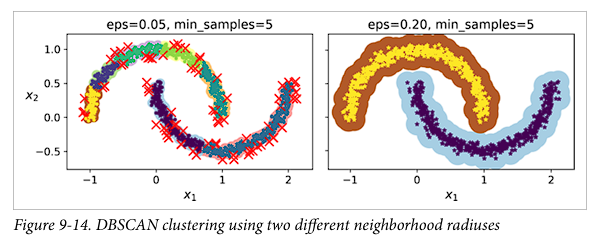

The **DBSCAN** class does not have a **predict()** method, although it has a **fit_predict()** method. In other words, it cannot predict which cluster a new cluster belongs to. This implementation decision was made because different classification algorithms can be better for different tasks, so the authors decided to let the user choose which one to use. Moreover, it's not hard to implement. For example, let's train a **KNeighborsClassifier**:

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

Now, given a few new instances we can predict which cluster they most likely belong to and even estimate a probability for each cluster:

In [48]:
X_new = np.array([[-0.5, 0], [0, 0.5],[1, -0.1],[2, 1]])
knn.predict(X_new)

array([6, 4, 2, 0])

In [49]:
knn.predict_proba(X_new)

array([[0.  , 0.  , 0.  , 0.  , 0.26, 0.  , 0.74, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  ],
       [0.34, 0.  , 0.66, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.82, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.18]])

Note that we only trained the classifier on the core instances, but we could also have chosen to train it on all the instances, or all but the anomalies: this choice depends on the final task.

The decision boundary is represented in the figure below (the crosses represent the four instnaces in X_new). Notice that since there is no anomaly in the training set, the classifier always chooses a cluster, even when that cluster is far away. It is fairly straigt forward to introduce a maximum distnace, in which case the two instances that are far away from both clusters are classifier as anomalies. To do this, use the the **kneighbors()** method of the **KNeighborsClassifier**. Given a set of instances, it return the distances and the indices of the k nearest neighbors in the training set:

In [50]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  4,  2, -1])

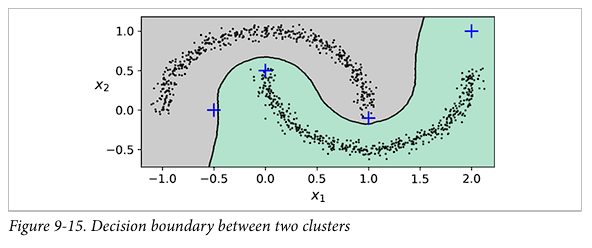

In short, DBSCAN is a very simple yet powerful algorithm capable of identifying any number of any shape. It is robust to outliers, and it has just two hyperparameters (**eps** and **min_samples**). If the density varies significantly across the clusters, however, it can be impossible for it to capture all the cluster properly. Its computational complexity is roughly O(m log m), making it pretty close to linear with regard to the number of instnaces, but Scikit-Learn's implementation can require up to O(m^2) memory if eps is large.